In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data =pd.read_csv("CHD_preprocessed.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.shape

(4133, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


In [5]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
data.isnull().sum()/4238*100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [7]:
data.education=data.education.fillna(data.education.median())

In [8]:
data.cigsPerDay.fillna(data.cigsPerDay.mode()[0],inplace=True)

In [9]:
data.BPMeds.fillna(data.BPMeds.mode()[0],inplace=True)

In [10]:
data.totChol.fillna(data.totChol.mode()[0],inplace=True)

In [11]:
data.BMI.fillna(data.BMI.median(),inplace = True)

In [12]:
data.heartRate.fillna(data.heartRate.mode()[0],inplace=True)

In [13]:
data.glucose.fillna(82.0,inplace=True)

In [14]:
data.isnull().sum().sum()

0

In [15]:
data.skew()

male                0.294061
age                 0.231914
education           0.976628
currentSmoker       0.020817
cigsPerDay          1.219609
BPMeds              5.114704
prevalentStroke    12.745352
prevalentHyp        0.816106
diabetes            6.003586
totChol             0.650375
sysBP               1.155604
diaBP               0.720494
BMI                 1.003289
heartRate           0.649929
glucose             6.559727
TenYearCHD          1.939875
dtype: float64

In [16]:
X = data.drop(columns = ['TenYearCHD'])
Y = data.TenYearCHD

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=0.25,random_state=0)

log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
accuracy_score(y_test,y_pred)

0.8539651837524178

In [19]:
confusion_matrix(y_test,y_pred)

array([[871,   5],
       [146,  12]], dtype=int64)

In [20]:
auc = roc_auc_score(y_test,y_pred)

In [21]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [22]:
print(fpr,tpr,thresholds)

[0.         0.00570776 1.        ] [0.         0.07594937 1.        ] [2 1 0]


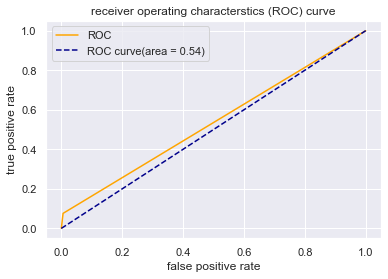

In [23]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       876
           1       0.71      0.08      0.14       158

    accuracy                           0.85      1034
   macro avg       0.78      0.54      0.53      1034
weighted avg       0.83      0.85      0.80      1034



In [25]:
from sklearn.metrics import f1_score

In [26]:
f1_score(y_test,y_pred)

0.13714285714285715

In [27]:
data.TenYearCHD.value_counts()

0    3505
1     628
Name: TenYearCHD, dtype: int64

In [28]:
pip install imblearn

In [29]:
from collections import Counter

In [30]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(X, Y)


print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 3505, 1: 628})
Resample dataset shape Counter({0: 3505, 1: 3505})


In [31]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_rus)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_rus,test_size=0.25,random_state=0)

log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred)

0.6913861950941244

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))



scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_rus)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_rus,test_size=0.25,random_state=0)

log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

Original dataset shape Counter({0: 3505, 1: 628})
Resample dataset shape Counter({0: 3505, 1: 3505})


LogisticRegression()

In [35]:
y_pred = log_reg.predict(x_test)


accuracy_score(y_test,y_pred)

0.6913861950941244

In [36]:
auc = roc_auc_score(y_test,y_pred)

In [37]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

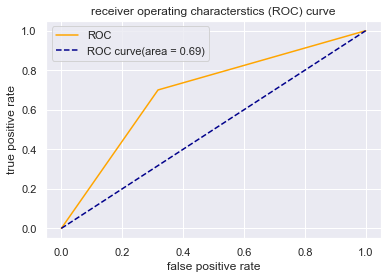

In [38]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

In [39]:
f1_score(y_test,y_pred)

0.6958965711073637